https://www.kaggle.com/code/kerneler/starter-international-astronaut-aa1ea028-2/input

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('drive/MyDrive/DS_Belhard/for_hw_3/International_Astronaut_Database.csv')
print(data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(567, 6)


In [ ]:
# вывод данных в формате таблицы
data.head()

,Name,Country,Gender,Flights,Total Flights,Total Flight Time (ddd:hh:mm)
0,Abdul Ahad Mohmand,Afghanistan,Man,Soyuz TM-6 (1988),1,008:20:26
1,Akihiko Hoshide,Japan,Man,"STS-124 (2008), Soyuz TMA-05M (2012)",2,140:17:26
2,Alan Bean,United States,Man,"Apollo 12 (1969), Skylab 3 (1973)",2,069:15:45
3,Alan G. Poindexter,United States,Man,"STS-122 (2008), STS-131 (2010)",2,027:21:09
4,Alan Shepard,United States,Man,"Mercury-Redstone 3 (1961), Apollo 14 (1971)",2,009:00:17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           567 non-null    object
 1   Country                        567 non-null    object
 2   Gender                         567 non-null    object
 3   Flights                        567 non-null    object
 4   Total Flights                  567 non-null    int64 
 5   Total Flight Time (ddd:hh:mm)  567 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.7+ KB


In [ ]:
# Количество уникальных значений в каждом столбце
unique_counts = data.nunique()
print(unique_counts)

Name                             567
Country                           42
Gender                             2
Flights                          509
Total Flights                      7
Total Flight Time (ddd:hh:mm)    511
dtype: int64


In [ ]:
# Создание справочника уникальных значений для каждого столбца
unique_values_dict = {col: data[col].unique().tolist() for col in data.columns}

# Вывод справочника
for col, unique_values in unique_values_dict.items():
    print(f"Столбец '{col}': {unique_values}")

Столбец 'Name': ['Abdul Ahad Mohmand', 'Akihiko Hoshide', 'Alan Bean', 'Alan G. Poindexter', 'Alan Shepard', 'Albert Sacco', 'Aleksandar Panayotov Aleksandrov', 'Aleksandr Balandin', 'Aleksandr Ivanchenkov', 'Aleksandr Laveykin', 'Aleksandr Lazutkin', 'Aleksandr Misurkin', 'Aleksandr Pavlovich Aleksandrov', 'Aleksandr Samokutyayev', 'Aleksandr Serebrov', 'Aleksandr Skvortsov', 'Aleksei Gubarev', 'Aleksei Leonov', 'Aleksei Yeliseyev', 'Aleksey Ovchinin', 'Alexander Gerst', 'Alexander Kaleri', 'Alexander Poleshchuk', 'Alexander Viktorenko', 'Alexander Volkov', 'Alfred Worden', 'Anatoli Berezovoy', 'Anatoli Ivanishin', 'Anatoli Levchenko', 'Anatoly Artsebarsky', 'Anatoly Filipchenko', 'Anatoly Solovyev', 'Andreas Mogensen', 'Andrei Borisenko', 'Andrew J. Feustel', 'Andrew M. Allen', 'Andrew R. Morgan', 'Andrew Thomas', 'Andriyan Nikolayev', 'André Kuipers', 'Anna Lee Fisher, M.D.', 'Anne McClain', 'Anousheh Ansari', 'Anthony W. England', 'Anton Shkaplerov', 'Arnaldo Tamayo Méndez', 'Aydyn

In [ ]:
# Разделение значений в столбце Flights
data['Flights'] = data['Flights'].str.split(', ')

# Преобразование DataFrame с использованием explode
data = data.explode('Flights')

# Вывод результата
print(data)

                   Name        Country Gender               Flights  \
0    Abdul Ahad Mohmand    Afghanistan    Man     Soyuz TM-6 (1988)   
1       Akihiko Hoshide          Japan    Man        STS-124 (2008)   
1       Akihiko Hoshide          Japan    Man  Soyuz TMA-05M (2012)   
2             Alan Bean  United States    Man      Apollo 12 (1969)   
2             Alan Bean  United States    Man       Skylab 3 (1973)   
..                  ...            ...    ...                   ...   
564        Yury Usachov         Russia    Man    Soyuz TM-23 (1996)   
564        Yury Usachov         Russia    Man        STS-101 (2000)   
564        Yury Usachov         Russia    Man        STS-102 (2001)   
565        Zhai Zhigang          China    Man     Shenzhou 7 (2008)   
566     Zhang Xiaoguang          China    Man    Shenzhou 10 (2013)   

     Total Flights Total Flight Time (ddd:hh:mm)  
0                1                     008:20:26  
1                2                     140:17

In [ ]:
# Создание нового столбца Year
data['Year'] = data['Flights'].str.extract(r'\((\d{4})\)')

# Удаление года из столбца Flights
data['Flights'] = data['Flights'].str.replace(r' \(\d{4}\)', '', regex=True)

print(data)

                   Name        Country Gender        Flights  Total Flights  \
0    Abdul Ahad Mohmand    Afghanistan    Man     Soyuz TM-6              1   
1       Akihiko Hoshide          Japan    Man        STS-124              2   
1       Akihiko Hoshide          Japan    Man  Soyuz TMA-05M              2   
2             Alan Bean  United States    Man      Apollo 12              2   
2             Alan Bean  United States    Man       Skylab 3              2   
..                  ...            ...    ...            ...            ...   
564        Yury Usachov         Russia    Man    Soyuz TM-23              4   
564        Yury Usachov         Russia    Man        STS-101              4   
564        Yury Usachov         Russia    Man        STS-102              4   
565        Zhai Zhigang          China    Man     Shenzhou 7              1   
566     Zhang Xiaoguang          China    Man    Shenzhou 10              1   

    Total Flight Time (ddd:hh:mm)  Year  
0        

In [ ]:
# Вывод названий всех столбцов
print(data.columns)

Index(['Name', 'Country', 'Gender', 'Flights', 'Total Flights',
       'Total Flight Time (ddd:hh:mm)', 'Year'],
      dtype='object')


In [ ]:
import pandas as pd
import os

# Указанные столбцы
columns_to_encode = ['Name', 'Country', 'Gender', 'Flights']

# Создание словарей только для указанных категориальных столбцов
dictionaries = {}
for column in columns_to_encode:
    unique_values = data[column].unique()
    dictionaries[column] = {value: idx for idx, value in enumerate(unique_values)}

# Замена значений в основном DataFrame на ключи из словарей
for column in columns_to_encode:
    data[column] = data[column].map(dictionaries[column])

# Сохранение преобразованного DataFrame
transformed_df_path = '/content/drive/My Drive/DS_Belhard/for_hw_3/Main_table.csv'
data.to_csv(transformed_df_path, index=False)
print(f"Transformed DataFrame saved to {transformed_df_path}")

# Путь к папке на Google Диске
save_path = '/content/drive/My Drive/DS_Belhard/for_hw_3'

# Создание папки, если она не существует
os.makedirs(save_path, exist_ok=True)

# Сохранение DataFrame для каждого словаря на Google Диск
for column in columns_to_encode:
    dict_df = pd.DataFrame(list(dictionaries[column].items()), columns=[column, 'Index'])
    dict_df.to_csv(f'{save_path}/{column}_dictionary.csv', index=False)
    print(f"Dictionary for {column} saved to {save_path}/{column}_dictionary.csv")
    print(dict_df)
    print("\n")

print("Transformed DataFrame:")
print(data)

Transformed DataFrame saved to /content/drive/My Drive/DS_Belhard/for_hw_3/Main_table.csv
Dictionary for Name saved to /content/drive/My Drive/DS_Belhard/for_hw_3/Name_dictionary.csv
                   Name  Index
0    Abdul Ahad Mohmand      0
1       Akihiko Hoshide      1
2             Alan Bean      2
3    Alan G. Poindexter      3
4          Alan Shepard      4
..                  ...    ...
562      Yuri Romanenko    562
563        Yuri Shargin    563
564        Yury Usachov    564
565        Zhai Zhigang    565
566     Zhang Xiaoguang    566

[567 rows x 2 columns]


Dictionary for Country saved to /content/drive/My Drive/DS_Belhard/for_hw_3/Country_dictionary.csv
                 Country  Index
0            Afghanistan      0
1                  Japan      1
2          United States      2
3               Bulgaria      3
4           Soviet Union      4
5                 Russia      5
6                Germany      6
7                Denmark      7
8            Netherlands      8


Таким образом, схема проектируемой БД :

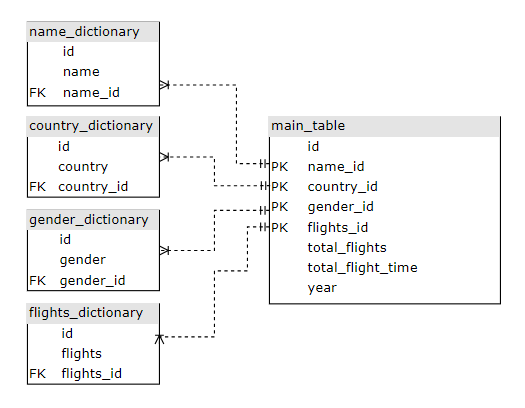